### Linear Regression 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset into a pandas DataFrame
df = pd.read_csv(r"C:\Users\HP\Downloads\python learning\capstone.csv")

# Display the first few rows of the dataset
df.head()




,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0


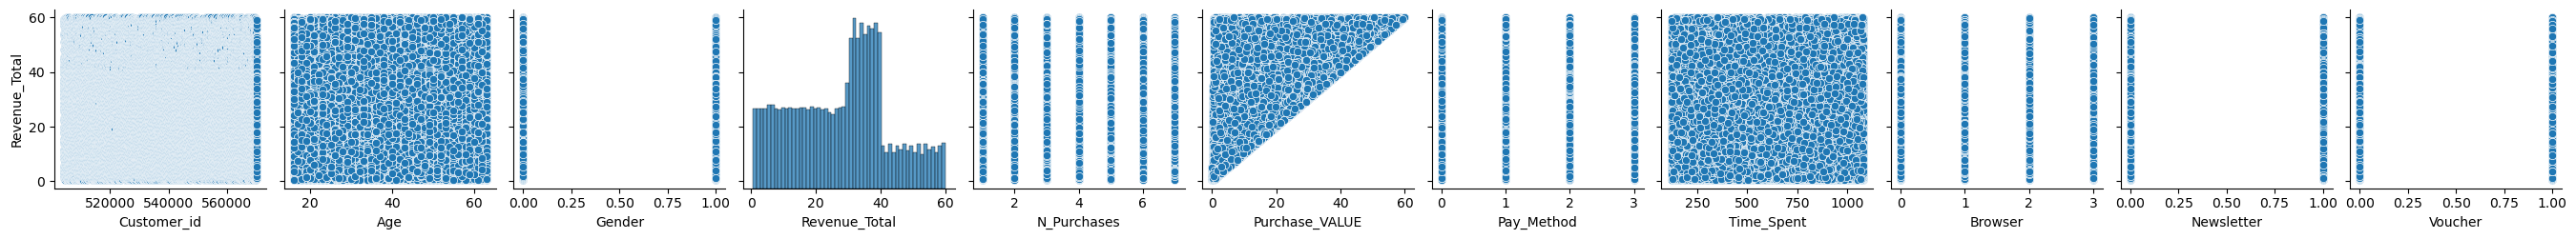

In [2]:
# Assumption 1: Linearity
# Check scatter plots of numerical variables against the target variable
sns.pairplot(df, x_vars=df.select_dtypes(include='number').columns, y_vars=["Revenue_Total"])
plt.show()


array([[<Axes: title={'center': 'Customer_id'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'Revenue_Total'}>,
        <Axes: title={'center': 'N_Purchases'}>,
        <Axes: title={'center': 'Purchase_VALUE'}>],
       [<Axes: title={'center': 'Pay_Method'}>,
        <Axes: title={'center': 'Time_Spent'}>,
        <Axes: title={'center': 'Browser'}>],
       [<Axes: title={'center': 'Newsletter'}>,
        <Axes: title={'center': 'Voucher'}>, <Axes: >]], dtype=object)

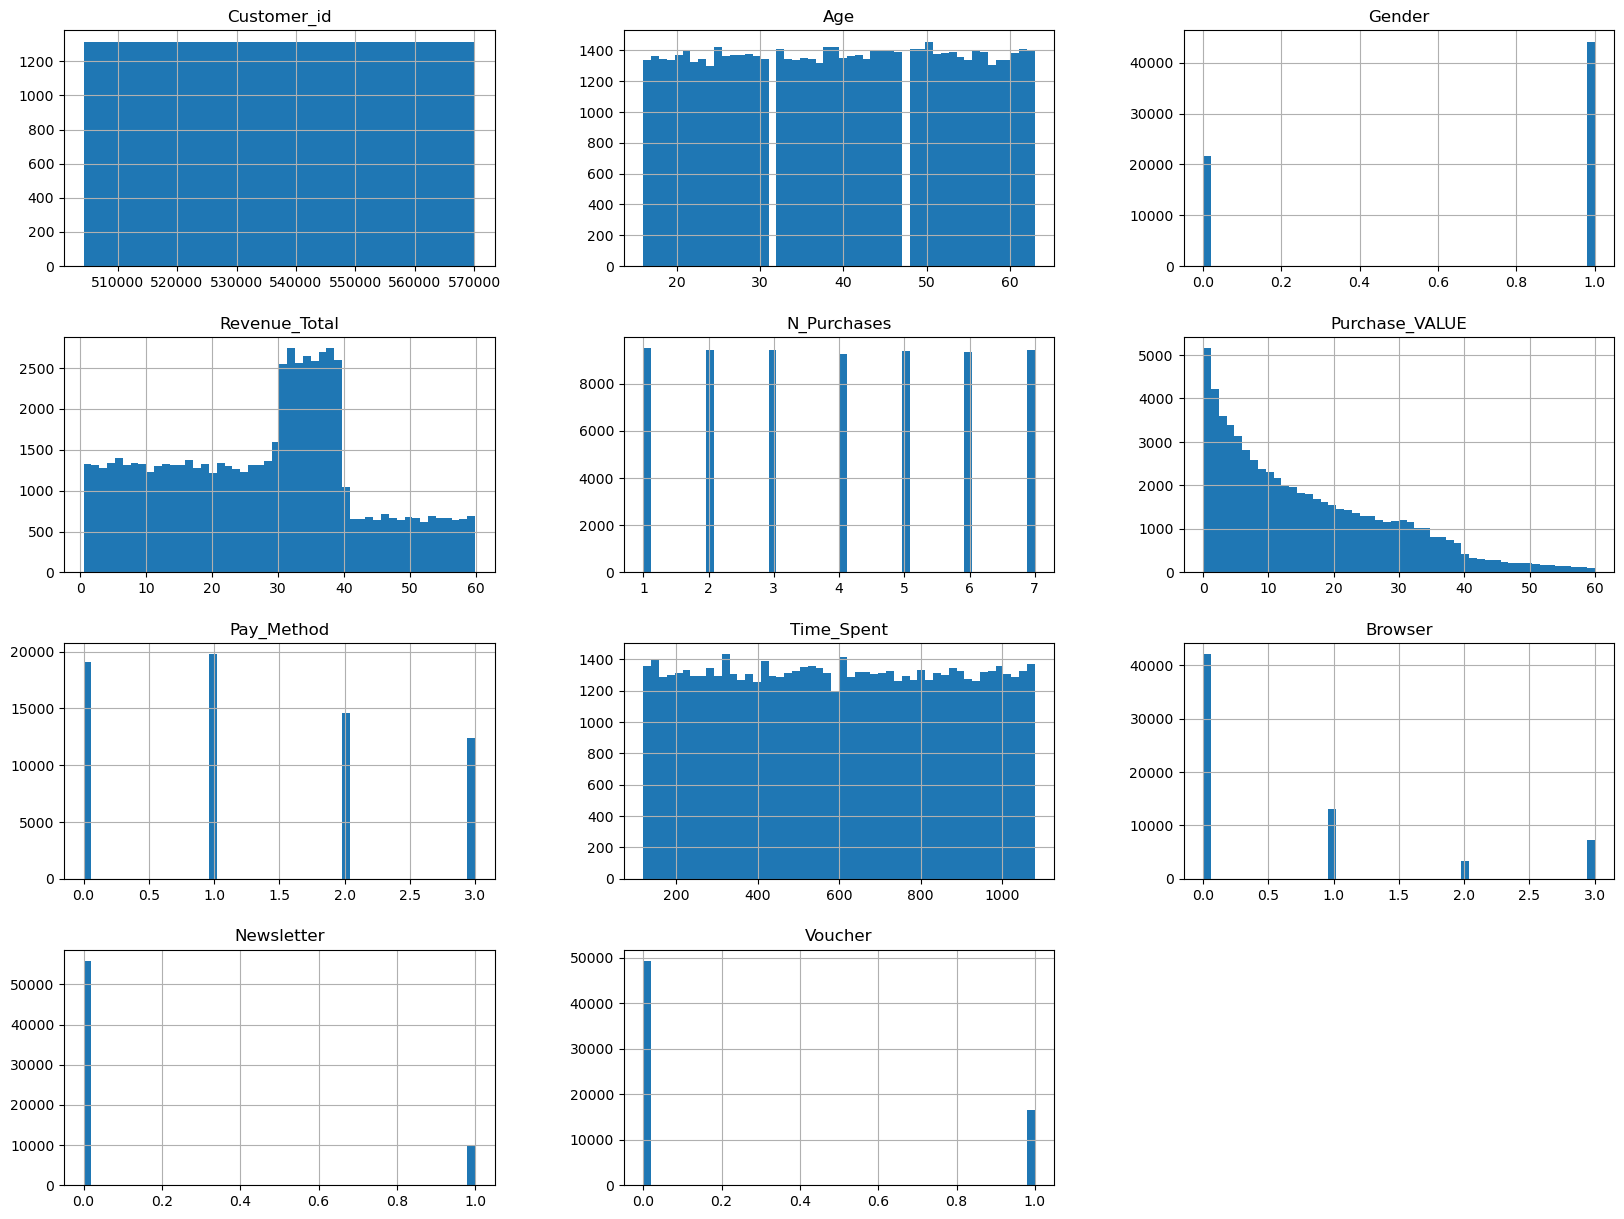

In [3]:
df.hist(bins=50, figsize=(20,15))

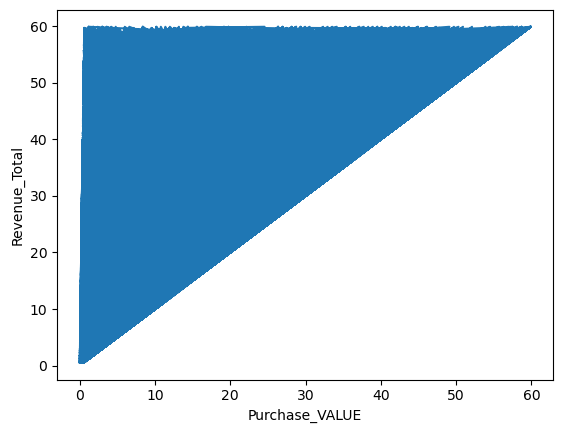

In [37]:
x = df['Purchase_VALUE']
y = df['Revenue_Total']

plt.plot(x,y)
plt.xlabel('Purchase_VALUE')
plt.ylabel('Revenue_Total')
plt.show()

#### Insight: Positive correlation is found

### To check Normal Distribution of Target Variable:

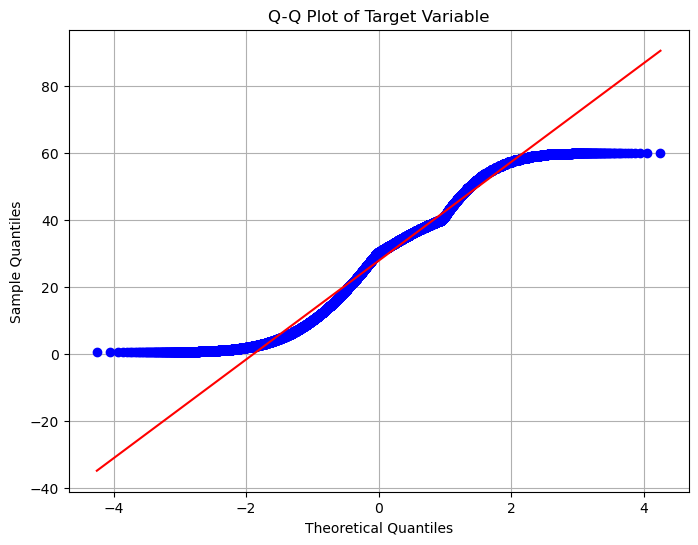

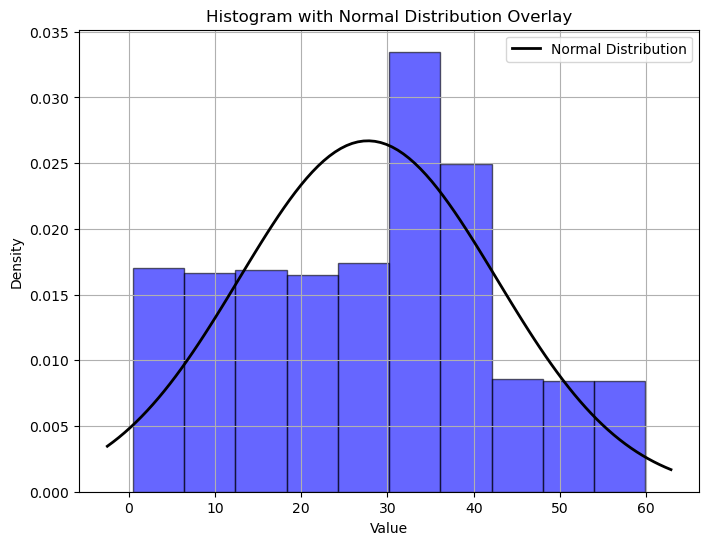

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


# Create a Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(df['Revenue_Total'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Target Variable')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

# Create a histogram with a normal distribution overlay
plt.figure(figsize=(8, 6))
plt.hist(df['Revenue_Total'], bins=10, density=True, alpha=0.6, color='b', edgecolor='black')

# Fit a normal distribution to the data
mu, sigma = stats.norm.fit(df['Revenue_Total'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

plt.title('Histogram with Normal Distribution Overlay')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


#### Insight : The target variable is not normally distributed 

### Outlier Detection

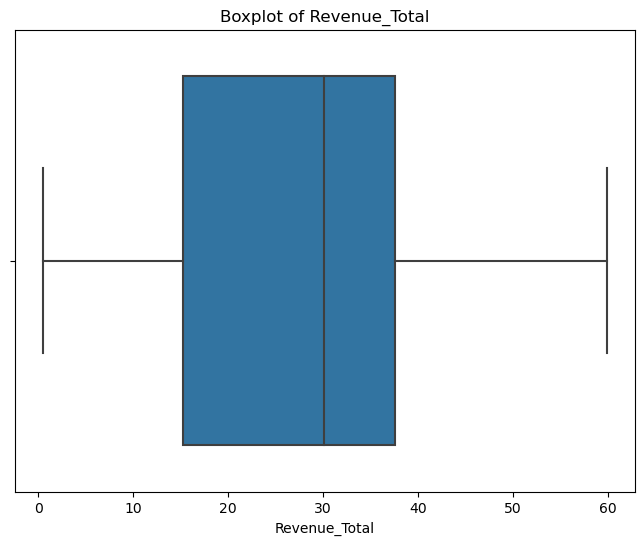

Outliers:
Empty DataFrame
Columns: [Customer_id, Age, Gender, Revenue_Total, N_Purchases, Purchase_DATE, Purchase_VALUE, Pay_Method, Time_Spent, Browser, Newsletter, Voucher]
Index: []


In [6]:
# Plot boxplot of the target variable
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Revenue_Total'])
plt.title('Boxplot of Revenue_Total')
plt.xlabel('Revenue_Total')
plt.show()

# Calculate IQR and identify outliers
Q1 = df['Revenue_Total'].quantile(0.25)
Q3 = df['Revenue_Total'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Revenue_Total'] < lower_bound) | (df['Revenue_Total'] > upper_bound)]
print('Outliers:')
print(outliers)

In [7]:
def detect_outliers(df, variable):
    quartile_1 = df[variable].quantile(0.25)
    quartile_3 = df[variable].quantile(0.75)
    interquartile_range = quartile_3 - quartile_1

    lower_limit = quartile_1 - 1.5 * interquartile_range
    upper_limit = quartile_3 + 1.5 * interquartile_range

    return df[variable].apply(lambda x: x < lower_limit or x > upper_limit)

if detect_outliers(df, 'Revenue_Total').any():
    print('Outliers detected. Further investigation required.')
else:
    print('No outliers detected.')

No outliers detected.


In [23]:
# Method 1: Interquartile Range (IQR)
Q1 = df['Revenue_Total'].quantile(0.25)
Q3 = df['Revenue_Total'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df['Revenue_Total'] < lower_bound) | (df['Revenue_Total'] > upper_bound)]

# Method 2: Z-score
z_scores = np.abs((df['Revenue_Total'] - df['Revenue_Total'].mean()) / df['Revenue_Total'].std())
outliers_zscore = df[z_scores > 3]  # Using a threshold of 3 standard deviations

# Print the outliers detected by both methods
print("Outliers detected by IQR method:")
print(outliers_iqr)

print("\nOutliers detected by Z-score method:")
print(outliers_zscore)


Outliers detected by IQR method:
Empty DataFrame
Columns: [Customer_id, Age, Gender, Revenue_Total, N_Purchases, Purchase_DATE, Purchase_VALUE, Pay_Method, Time_Spent, Browser, Newsletter, Voucher, Year, Month, DayOfWeek, DayOfMonth, Quarter]
Index: []

Outliers detected by Z-score method:
Empty DataFrame
Columns: [Customer_id, Age, Gender, Revenue_Total, N_Purchases, Purchase_DATE, Purchase_VALUE, Pay_Method, Time_Spent, Browser, Newsletter, Voucher, Year, Month, DayOfWeek, DayOfMonth, Quarter]
Index: []


### Feature Engineering

In [4]:
df['Purchase_DATE'] = pd.to_datetime(df['Purchase_DATE'])
df['Year'] = df['Purchase_DATE'].dt.year
df['Month'] = df['Purchase_DATE'].dt.month
df['DayOfWeek'] = df['Purchase_DATE'].dt.dayofweek
df['DayOfMonth'] = df['Purchase_DATE'].dt.day
df['Quarter'] = df['Purchase_DATE'].dt.quarter


In [9]:
df.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Year,Month,DayOfWeek,DayOfMonth,Quarter
0,504308,53,0,45.3,2,2021-06-22,24.915,1,885,0,0,0,2021,6,1,22,2
1,504309,18,1,36.2,3,2021-10-12,2.896,2,656,0,0,1,2021,10,1,12,4
2,504310,52,1,10.6,1,2021-03-14,10.600,0,761,0,1,0,2021,3,6,14,1
3,504311,29,0,54.1,5,2021-10-25,43.280,1,906,0,1,0,2021,10,0,25,4
4,504312,21,1,56.9,1,2021-09-14,56.900,1,605,0,1,0,2021,9,1,14,3


### Correlation Matrix

In [10]:
correlation_matrix = df.corr(method='pearson')

# Print the correlation matrix
print("Pearson Correlation Matrix:")
print(correlation_matrix)

Pearson Correlation Matrix:
                 Customer_id       Age    Gender  Revenue_Total  N_Purchases  \
Customer_id     1.000000e+00  0.000709  0.004021      -0.000883     0.001028   
Age             7.086380e-04  1.000000  0.001892       0.000091    -0.005580   
Gender          4.020520e-03  0.001892  1.000000      -0.001006     0.001474   
Revenue_Total  -8.834937e-04  0.000091 -0.001006       1.000000     0.005794   
N_Purchases     1.028347e-03 -0.005580  0.001474       0.005794     1.000000   
Purchase_VALUE  6.217474e-05  0.006416 -0.002496       0.649235    -0.219670   
Pay_Method     -1.553992e-03  0.000750 -0.006452       0.005789     0.004603   
Time_Spent      5.570396e-04 -0.001506  0.001595      -0.003520     0.001604   
Browser        -4.591505e-04  0.006471  0.002317      -0.004321     0.009660   
Newsletter     -3.519634e-07  0.003068 -0.001282       0.003578    -0.001593   
Voucher         9.247024e-04 -0.001288  0.001538       0.000071    -0.004484   
Year        

C:\Users\HP\AppData\Local\Temp\ipykernel_16812\4189770667.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


C:\Users\HP\AppData\Local\Temp\ipykernel_16812\1237383433.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


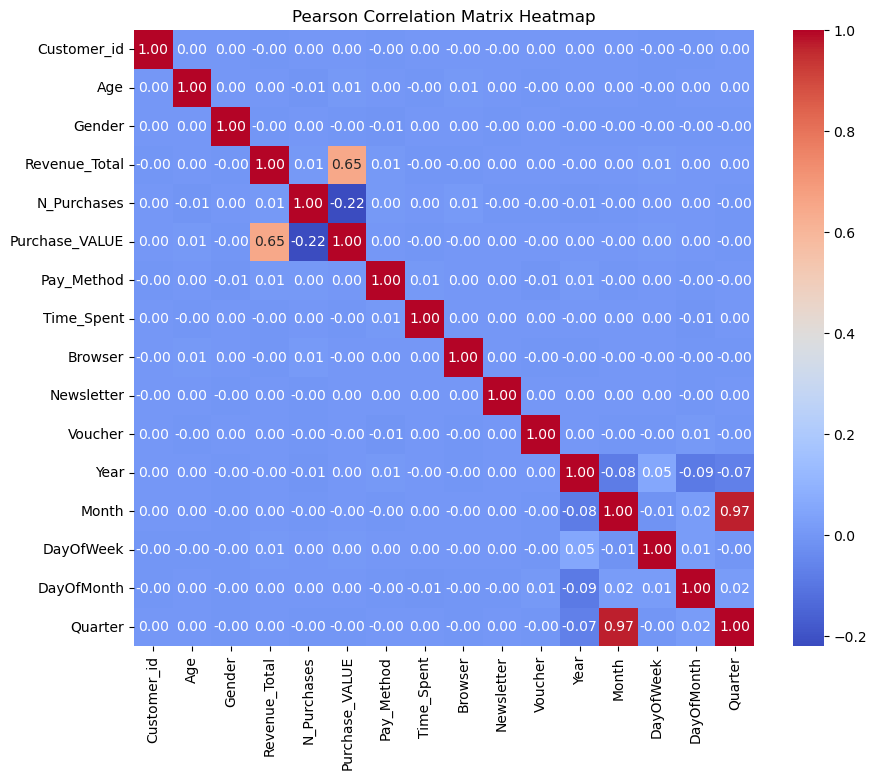

In [11]:
# Step 3: Pearson Correlation Matrix Heatmap

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix Heatmap')
plt.show()

### Splitting the data into X and y
Now, we partition the dataset into two components: X and y.

The variable X encompasses all independent variables, representing the features that contribute to our predictions.

On the other hand, y encapsulates the dependent variable or target variable, serving as the outcome we aim to predict.

### Train-Test Split
We'll now split the dataset into training and testing data. We will do an 80:20 split, so our test size will be set to 0.2.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import shapiro


X = df[['Purchase_VALUE',"N_Purchases"]]
y = df["Revenue_Total"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


#### Actual Sales vs Predicted Sales

In [29]:
import pandas as pd
predictions_df = pd.DataFrame({
    'Actual Sales': y_test,  
    'Predicted Sales': y_pred
})

predictions_df


,Actual Sales,Predicted Sales
44712,31.0,32.916363
43557,30.1,32.856206
13540,44.3,16.848583
15253,22.5,32.338676
42221,0.7,12.461822
...,...,...
15269,39.7,36.621965
11299,25.3,33.964544
32364,2.0,14.345905
18432,20.2,17.134187


### Distribution of residuals

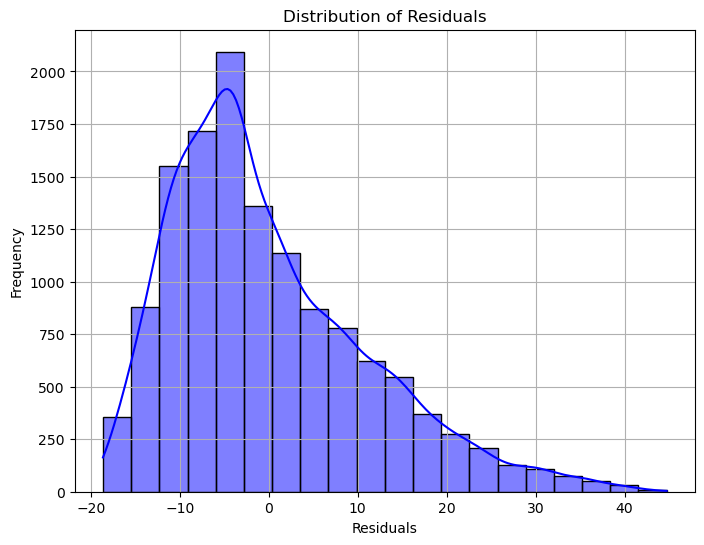

In [28]:
# Plot the distribution of residuals
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue', bins=20)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

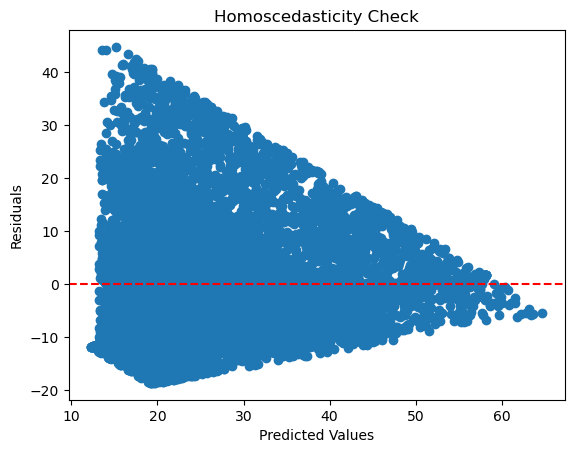

In [47]:
import seaborn as sns

# Residuals plot for homoscedasticity
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check")
plt.axhline(y=0, color='red', linestyle='--')
plt.show()




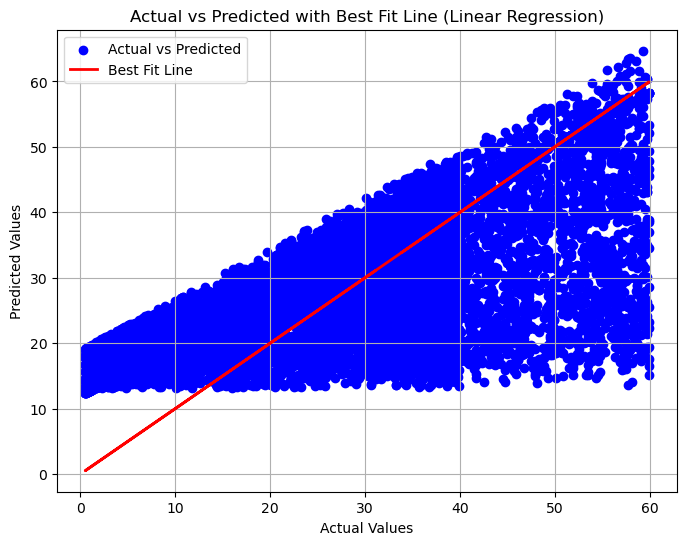

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', linestyle='-', linewidth=2, label='Best Fit Line')
plt.title('Actual vs Predicted with Best Fit Line (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

### VIF

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute the variance inflation factor (VIF) for each independent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

         Variable       VIF
0  Purchase_VALUE  1.642151
1     N_Purchases  1.642151


#### Insight : No Multicolinearity found

### OLS Regression Results

In [6]:
import statsmodels.api as sm

X_with_intercept = sm.add_constant(X)
# Create the OLS model
model = sm.OLS(y, X_with_intercept)
# Fit the model
results = model.fit()

# Print the summary of the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:          Revenue_Total   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                 2.634e+04
Date:                Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:31:38   Log-Likelihood:            -2.5193e+05
No. Observations:               65796   AIC:                         5.039e+05
Df Residuals:                   65793   BIC:                         5.039e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             10.7645      0.121     88.

### Evaluation Metrics

In [37]:
# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from math import sqrt
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
adj_r_squared = results.rsquared_adj

print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared: {r_squared}')
print("Adjusted R-squared (statsmodels):", adj_r_squared)

MAPE: 0.9485173227474236
RMSE: 11.130886339951891
MAE: 8.825437962495918
MSE: 123.89663071292762
R-squared: 0.44832371668564475
Adjusted R-squared (statsmodels): 0.4446316737848065


###  Addressing the issue of  target variable that is not normally distributed

### WHY:Square root transformation

1.Normalization: Square root transformation helps to make the distribution of the target variable more symmetrical and closer to a normal distribution, which is often assumed in statistical analyses.

2.Stabilizing Variance: It can also stabilize the variance of the target variable, making the data more suitable for linear regression and other modeling techniques.

3.Better Model Performance: Transforming the target variable can lead to more accurate model predictions and reliable statistical inferences, especially when the original distribution deviates significantly from normality.








### Applying Square Root Transformtion 

In [7]:

# Apply Square Root transformation 
df['Revenue_sqrt'] = np.sqrt(df['Revenue_Total'])



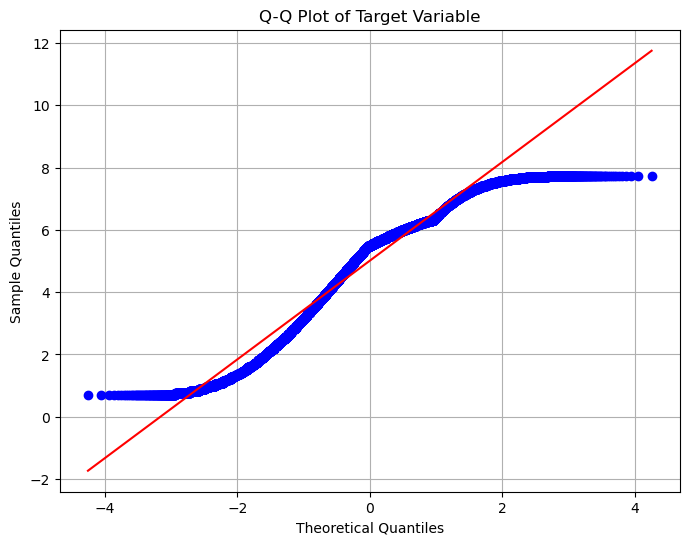

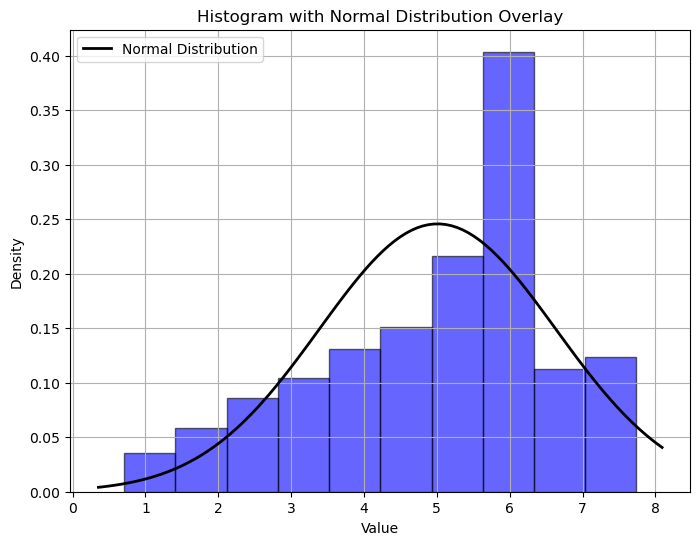

In [11]:
import scipy.stats as stats
# Create a Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(df['Revenue_sqrt'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Target Variable')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

# Create a histogram with a normal distribution overlay
plt.figure(figsize=(8, 6))
plt.hist(df['Revenue_sqrt'], bins=10, density=True, alpha=0.6, color='b', edgecolor='black')

# Fit a normal distribution to the data
mu, sigma = stats.norm.fit(df['Revenue_sqrt'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

plt.title('Histogram with Normal Distribution Overlay')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_312\1237383433.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


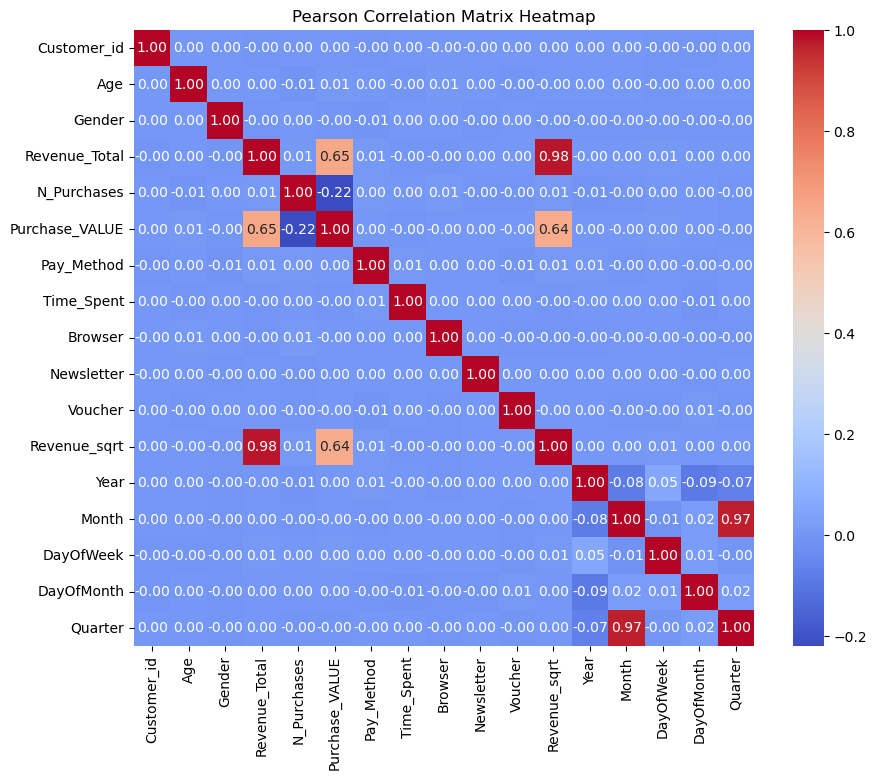

In [33]:
# Step 3: Pearson Correlation Matrix Heatmap

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix Heatmap')
plt.show()

In [8]:
X = df[['Purchase_VALUE','N_Purchases']]
y = df["Revenue_sqrt"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


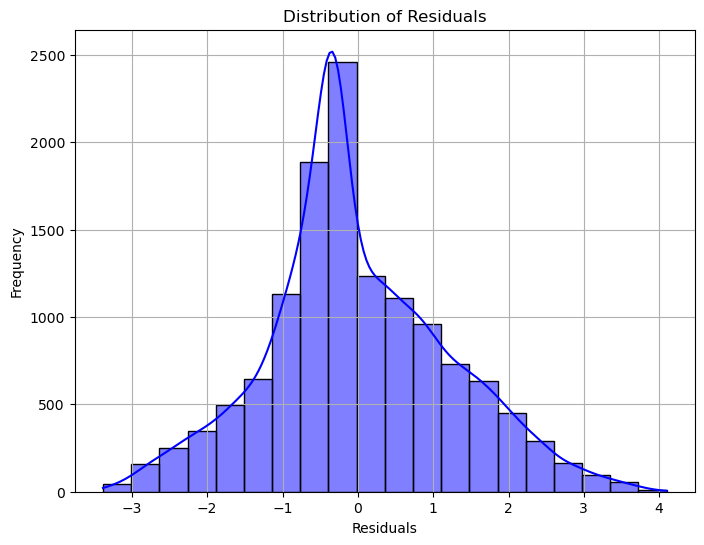

In [20]:
# Plot the distribution of residuals
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue', bins=20)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute the variance inflation factor (VIF) for each independent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

         Variable       VIF
0  Purchase_VALUE  1.642151
1     N_Purchases  1.642151


In [22]:
import statsmodels.api as sm
X_with_intercept = sm.add_constant(X)
# Create the OLS model
model = sm.OLS(y, X_with_intercept)  # Replace y and X with your target variable and feature matrix, respectively

# Fit the model
results = model.fit()

# Print the summary of the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:           Revenue_sqrt   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                 2.453e+04
Date:                Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:47:27   Log-Likelihood:            -1.0694e+05
No. Observations:               65796   AIC:                         2.139e+05
Df Residuals:                   65793   BIC:                         2.139e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.2029      0.013    239.

In [18]:
# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from math import sqrt
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'MAPE: {mape}')

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared: {r_squared}')
adj_r_squared = results.rsquared_adj
print("Adjusted R-squared:", adj_r_squared)

MAPE: 0.28620746954815357
RMSE: 1.2259406632188898
MAE: 0.9586195204138883
MSE: 1.5029305097335715
R-squared: 0.4318671891442435
Adjusted R-squared: 0.42717057746484033


In [24]:
import pandas as pd
predictions_df = pd.DataFrame({
    'Actual Sales': y_test**2,  
    'Predicted Sales': y_pred**2
})

predictions_df


,Actual Sales,Predicted Sales
44712,31.0,30.941235
43557,30.1,30.854692
13540,44.3,14.828417
15253,22.5,30.248896
42221,0.7,11.449373
...,...,...
15269,39.7,35.489723
11299,25.3,32.188414
32364,2.0,12.843325
18432,20.2,15.058379


In [3]:
df = pd.DataFrame(df)

# Export DataFrame to Excel
df.to_excel('output2.xlsx', index=False)